# Use CDF to Calculate Probabilities
Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Upload Data

In [3]:
#import file
filename = "Data/data.csv"
df = pd.read_csv(filename, low_memory = False)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
#filtering out to get just the females
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

In [5]:
#feature of interest
data = females['Height']

In [6]:
#getting stats needed to calculate cdf
mean = data.mean()
std = data.std()
min = data.min()
max = data.max()

In [7]:
x_spacing = np.linspace(min, max,1000)

In [8]:
cdf = stats.norm.cdf(x_spacing, loc=mean, scale=std)

## 1. Height between 55.0 and 56.0 inches

In [9]:
#creating high and low variables
high= 56
low= 55

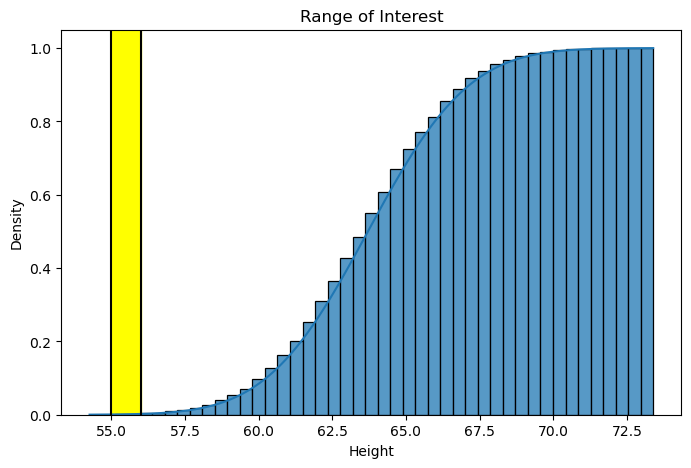

In [11]:
#plotting cdf and showing area of interest
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_spacing,cdf)
ax.axvline(low, color= 'black')
ax.axvline(high, color ='black')
ax.axvspan(low, high, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [12]:
## we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high, loc=mean,scale=std) - stats.norm.cdf(low,loc=mean, scale=std)

0.0015055206795372414

## 2. Height is less than 5 feet (60 in)

In [13]:
#there is no need to subtract for less than x calculations
stats.norm.cdf(60, loc=mean,scale=std)

0.0844862355340375

# 3. Height is greater than the mean (hint: do you know this answer intuitively?)

In [14]:
mean

63.708773603458006

In [15]:
#for greater than x calculation you have to subtract from 1
1 -stats.norm.cdf(mean, loc=mean,scale=std)

0.5